# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Set display precision
pd.set_option('display.precision', 1)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


In [ ]:
import warnings
warnings.filterwarnings("ignore")

##Reading the Data set

In [ ]:
# loading the dataset
data_main = pd.read_csv("stock_data.csv")
data = data_main.copy()

## Data Overview

- Observations
- Sanity checks

###Shape of dataset

In [ ]:
data.shape

(340, 15)

###Checking random five rows in data set

In [ ]:
data.sample(n=5, random_state = 1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102

###Checking data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

###Checking for duplicates

In [ ]:
#Checking for duplicates
duplicates = data.duplicated().sum()
print(f'There are {duplicates} duplicates')

There are 0 duplicates


###Checking for missing values

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()

print(f"There are {missing_values.sum()} missing values in the DataFrame.")


There are 0 missing values in the DataFrame.


###Checking statitiscal summary of data

In [ ]:
data.describe(include= 'all').T # Statistical summary of data set

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

**Answers**

1. The distribution of stock prices is markedly skewwed to the right, with a couple of outliers lying to the right.

2. The Health sector has seen the highest maximum price increase on the average.

3. There is a high correlation between Earnings per share and Current price, this may imply that stocks that pay out higher dividends are more likely to attract new investors who will drive up the price. There is also moderate negative correlation between volatility and price change, this may imply when price state going parabolic, this attracts a lot of retail investors and speculators looking for quick profits by taking advantage of price swings thus driving volatility. There is also high positive correlation between net income and estimated shares outstanding, as well as, net income and earnings per share; This may imply that high dividend paying companies will have high demand for any new share they issue out for sale as a result of their high profitability.

4. The IT sector and the financial sector seem to have the highest average cash ratio, this may be connected to the fact that this two sectors are quite sensitive to bearish economic phases  which may impact on their income. Thus, they need to have enough cash in hand to meet finacial obligation irrespective of the market cycle.
Utilities and telecommunication sectors seem to have the least average cash ratio, and this may be connected to the fact their income are not majorly impacted by economic downturn as compared to other sector thus are able to meet financial commitments during slow economic periods. Since, the product or services they provide are considered essential for survival.

5. Most sectors have P/E ratios close to each other, however, the Real estate and energy sector stand out for higher P/E ratios. This may be due to the fact that housing and energy and essential aspects of survival by any population. Thus, investors consider always investing in this sectors irrespective of economic cycles or even company performances. There may be a lot of Growth companies in this categories, who eventhough may not be profitable initially due to higher early investment, but may provide financial wind falls for there shareholders in later years, tHIS why investors may value companies in this sector irrespective of current profitability.

###Defining functions to carryout EDA.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

###Univariate analysis.

####**Univariate analysis of Numerical Variables**

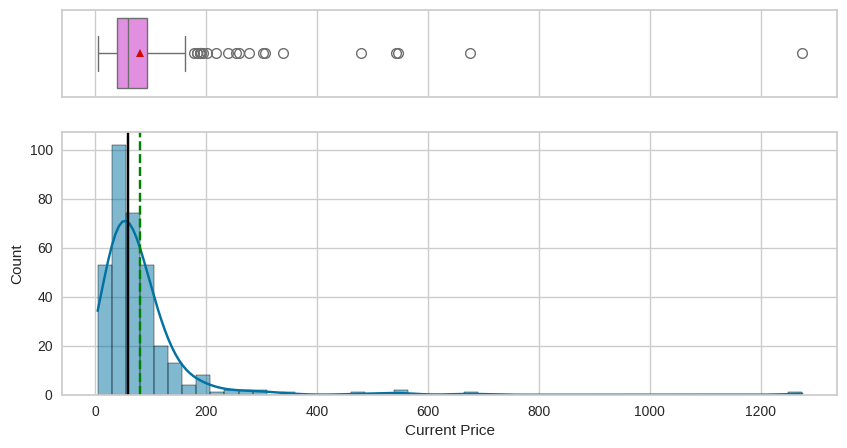

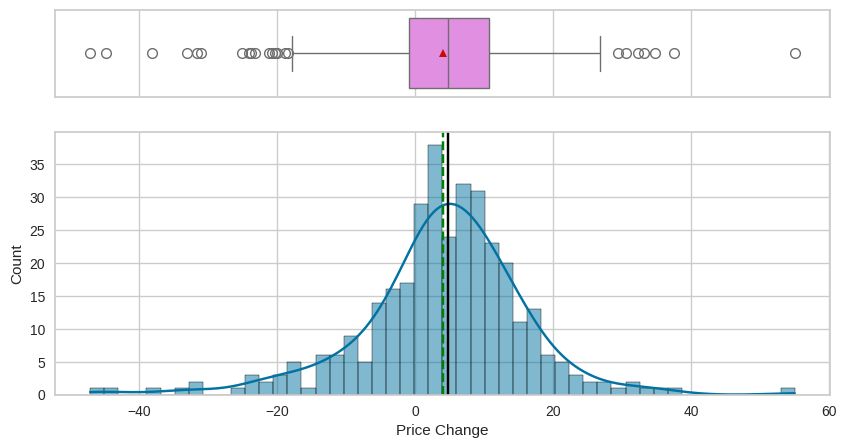

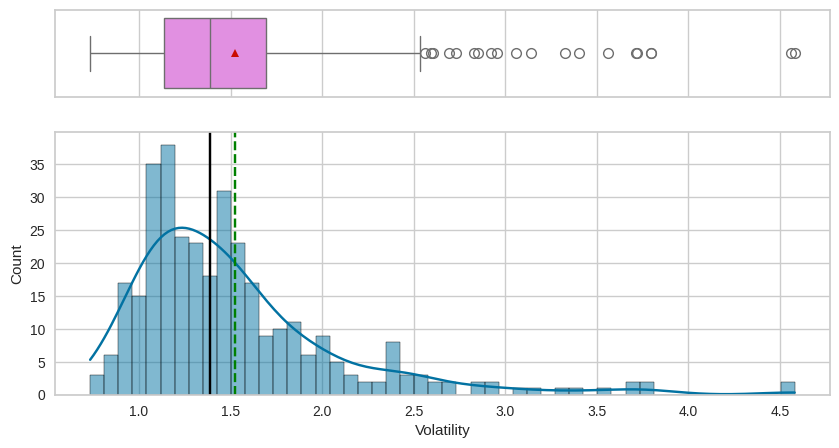

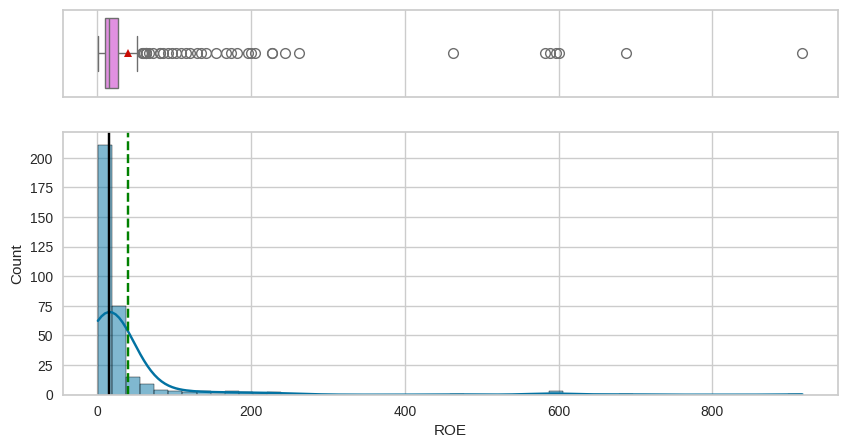

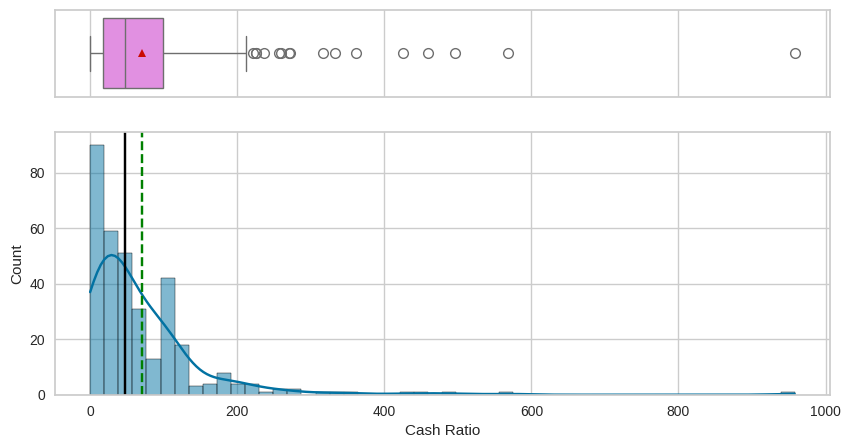

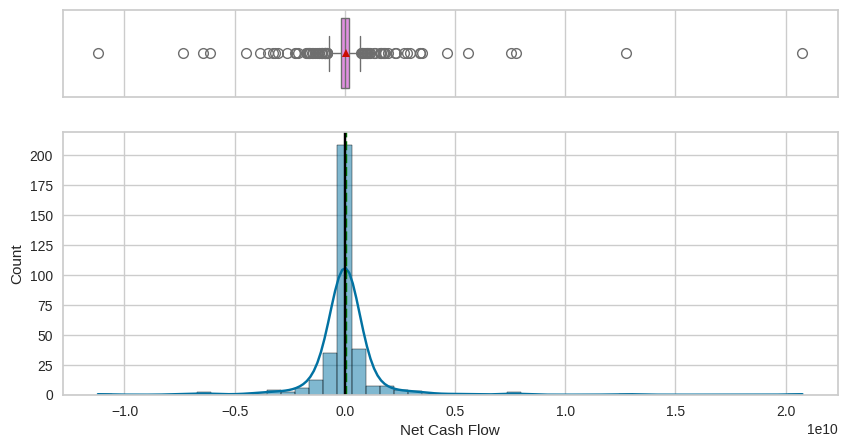

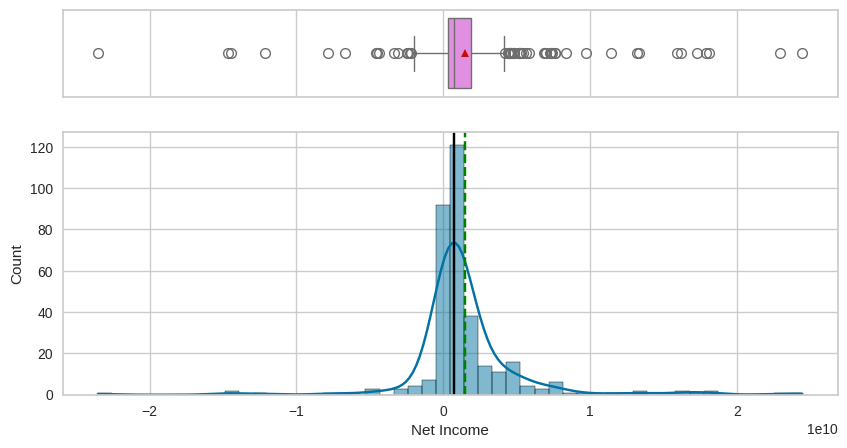

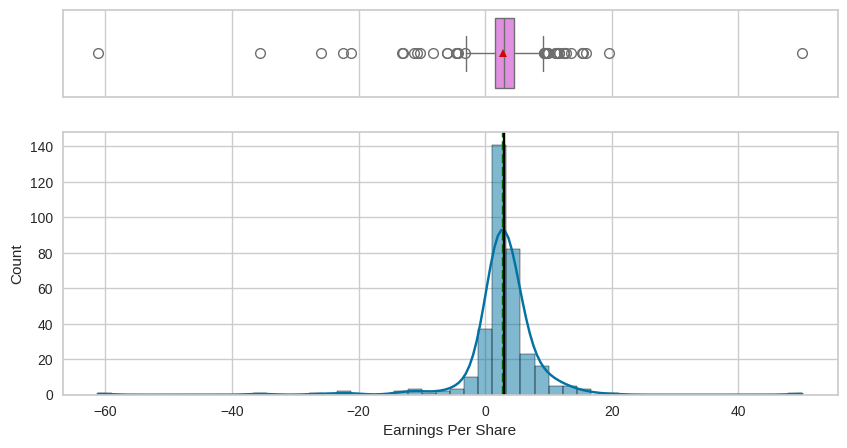

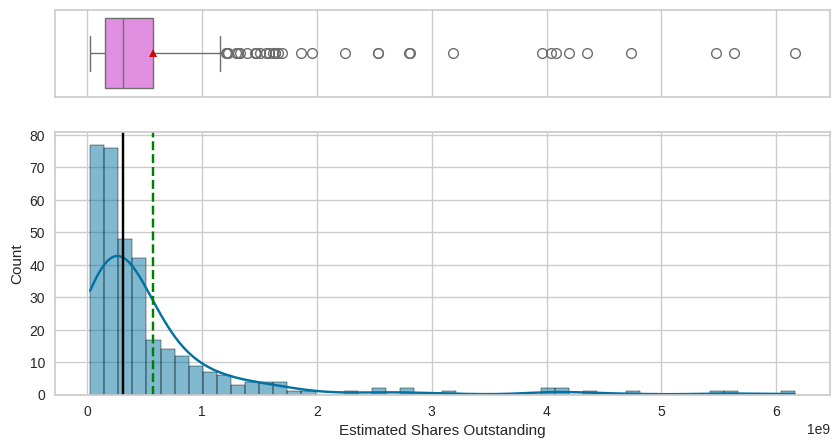

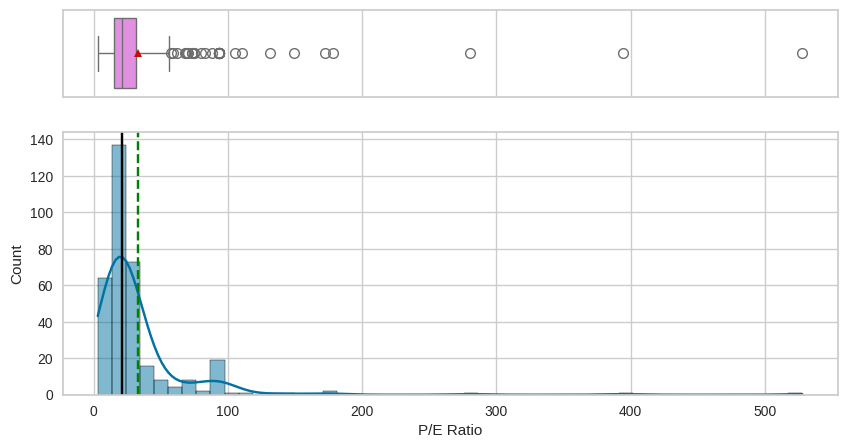

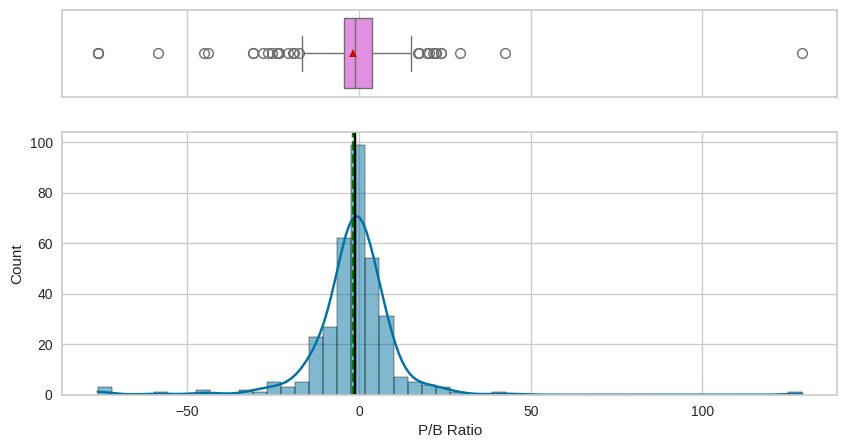

In [ ]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

- The following features are skewwed to the right; ROE, current price, volatility, P/E ratio, estimated shares outstanding, and cash ratio.
- The distribution of the other features may be considered normal.

####**Unvariate analysis of categorical variables**

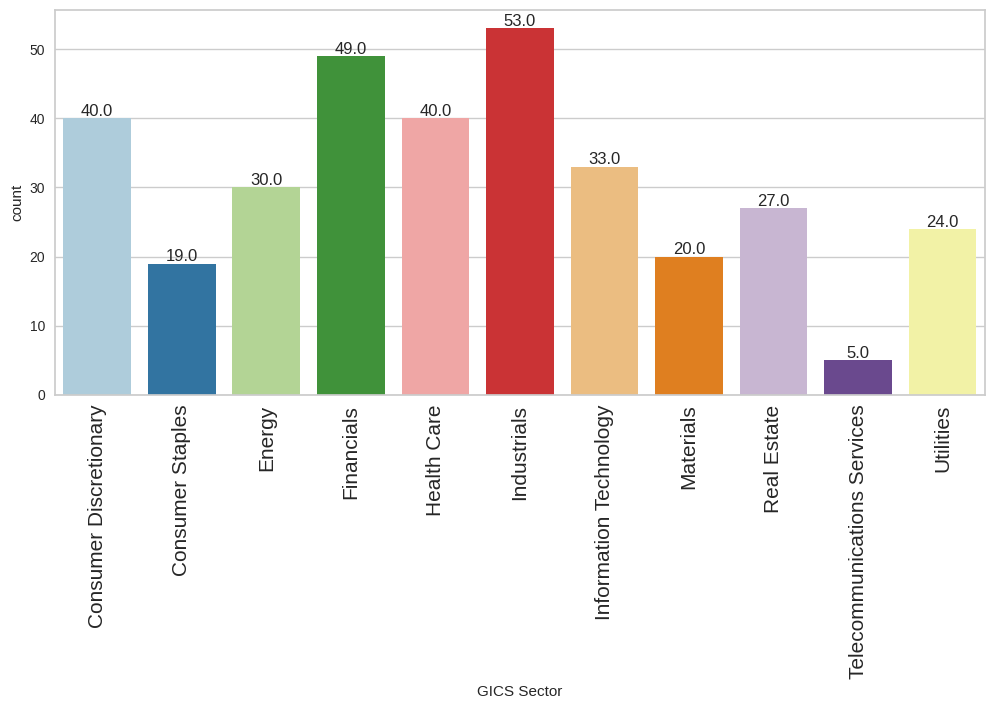

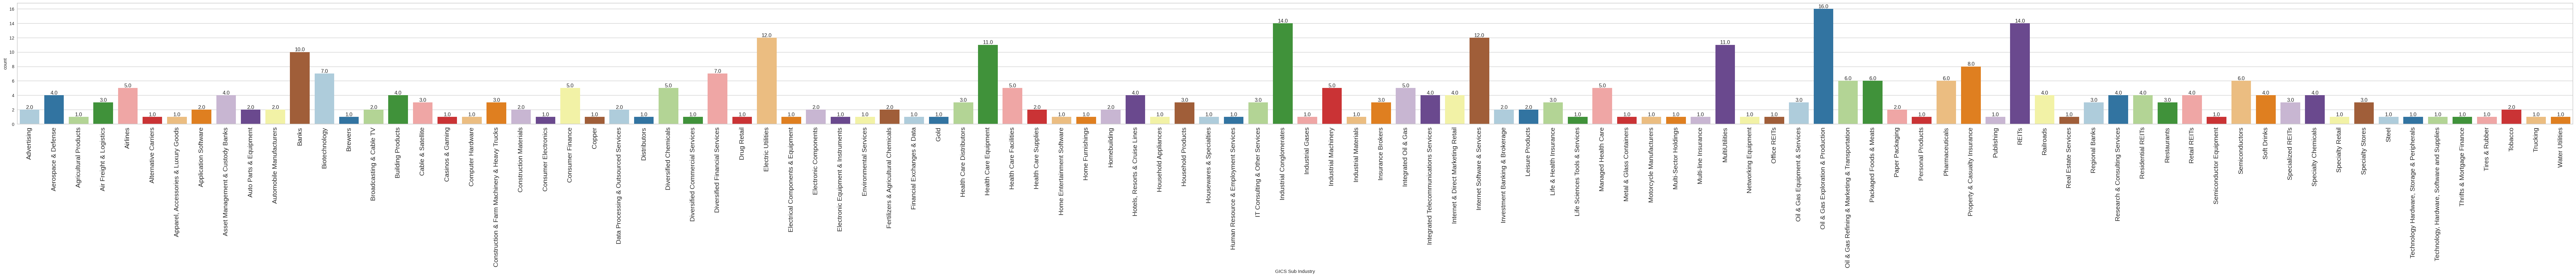

In [ ]:


# Select numerical columns (should be 'object' not 'np.object_')
num_cat = data.select_dtypes(include=object).columns.tolist()

# Drop specific columns using list comprehension
num_cat = [col for col in num_cat if col not in ['Ticker Symbol', 'Security']]

# Ensure the labeled_barplot function is defined somewhere in the code
# or imported from the relevant module/library

for item in num_cat:
    labeled_barplot(data, item, perc=False, n=None)

- The top 3 GIC sectors represented in the data set are; Financials, industrials, and consumer descretionaries.

- Oil and Gas is the top sub industry represented in the data set.


###Bivariate analysis

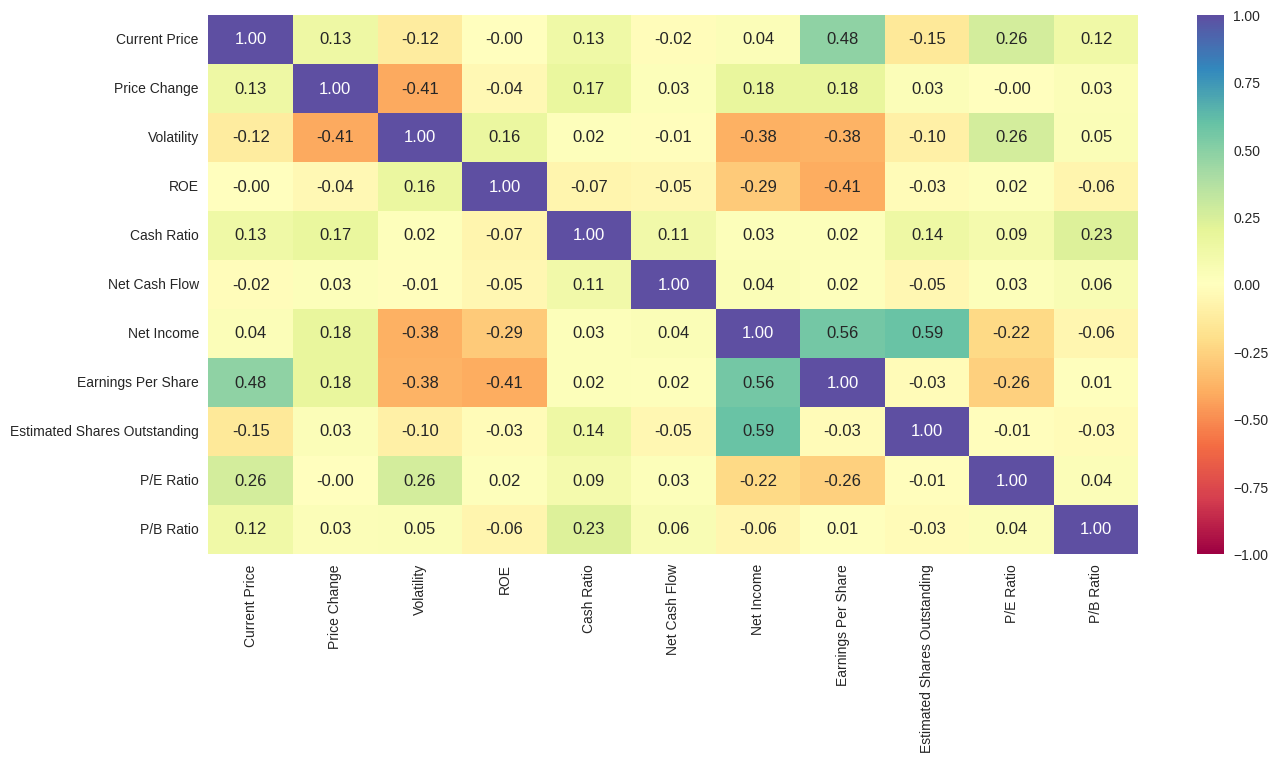

In [ ]:
# PLotting correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- There is a high correlation between Earnings per share and Current price, this may imply that stocks that pay out higher dividends are more likely to attract new investors who will drive up the price. There is also moderate negative correlation between volatility and price change, this may imply when price state going parabolic, this attracts a lot of retail investors and speculators looking for quick profits by taking advantage of price swings thus driving volatility. There is also high positive correlation between net income and estimated shares outstanding, as well as, net income and earnings per share; This may imply that high dividend paying companies will have high demand for any new share they issue out for sale as a result of their high profitability.

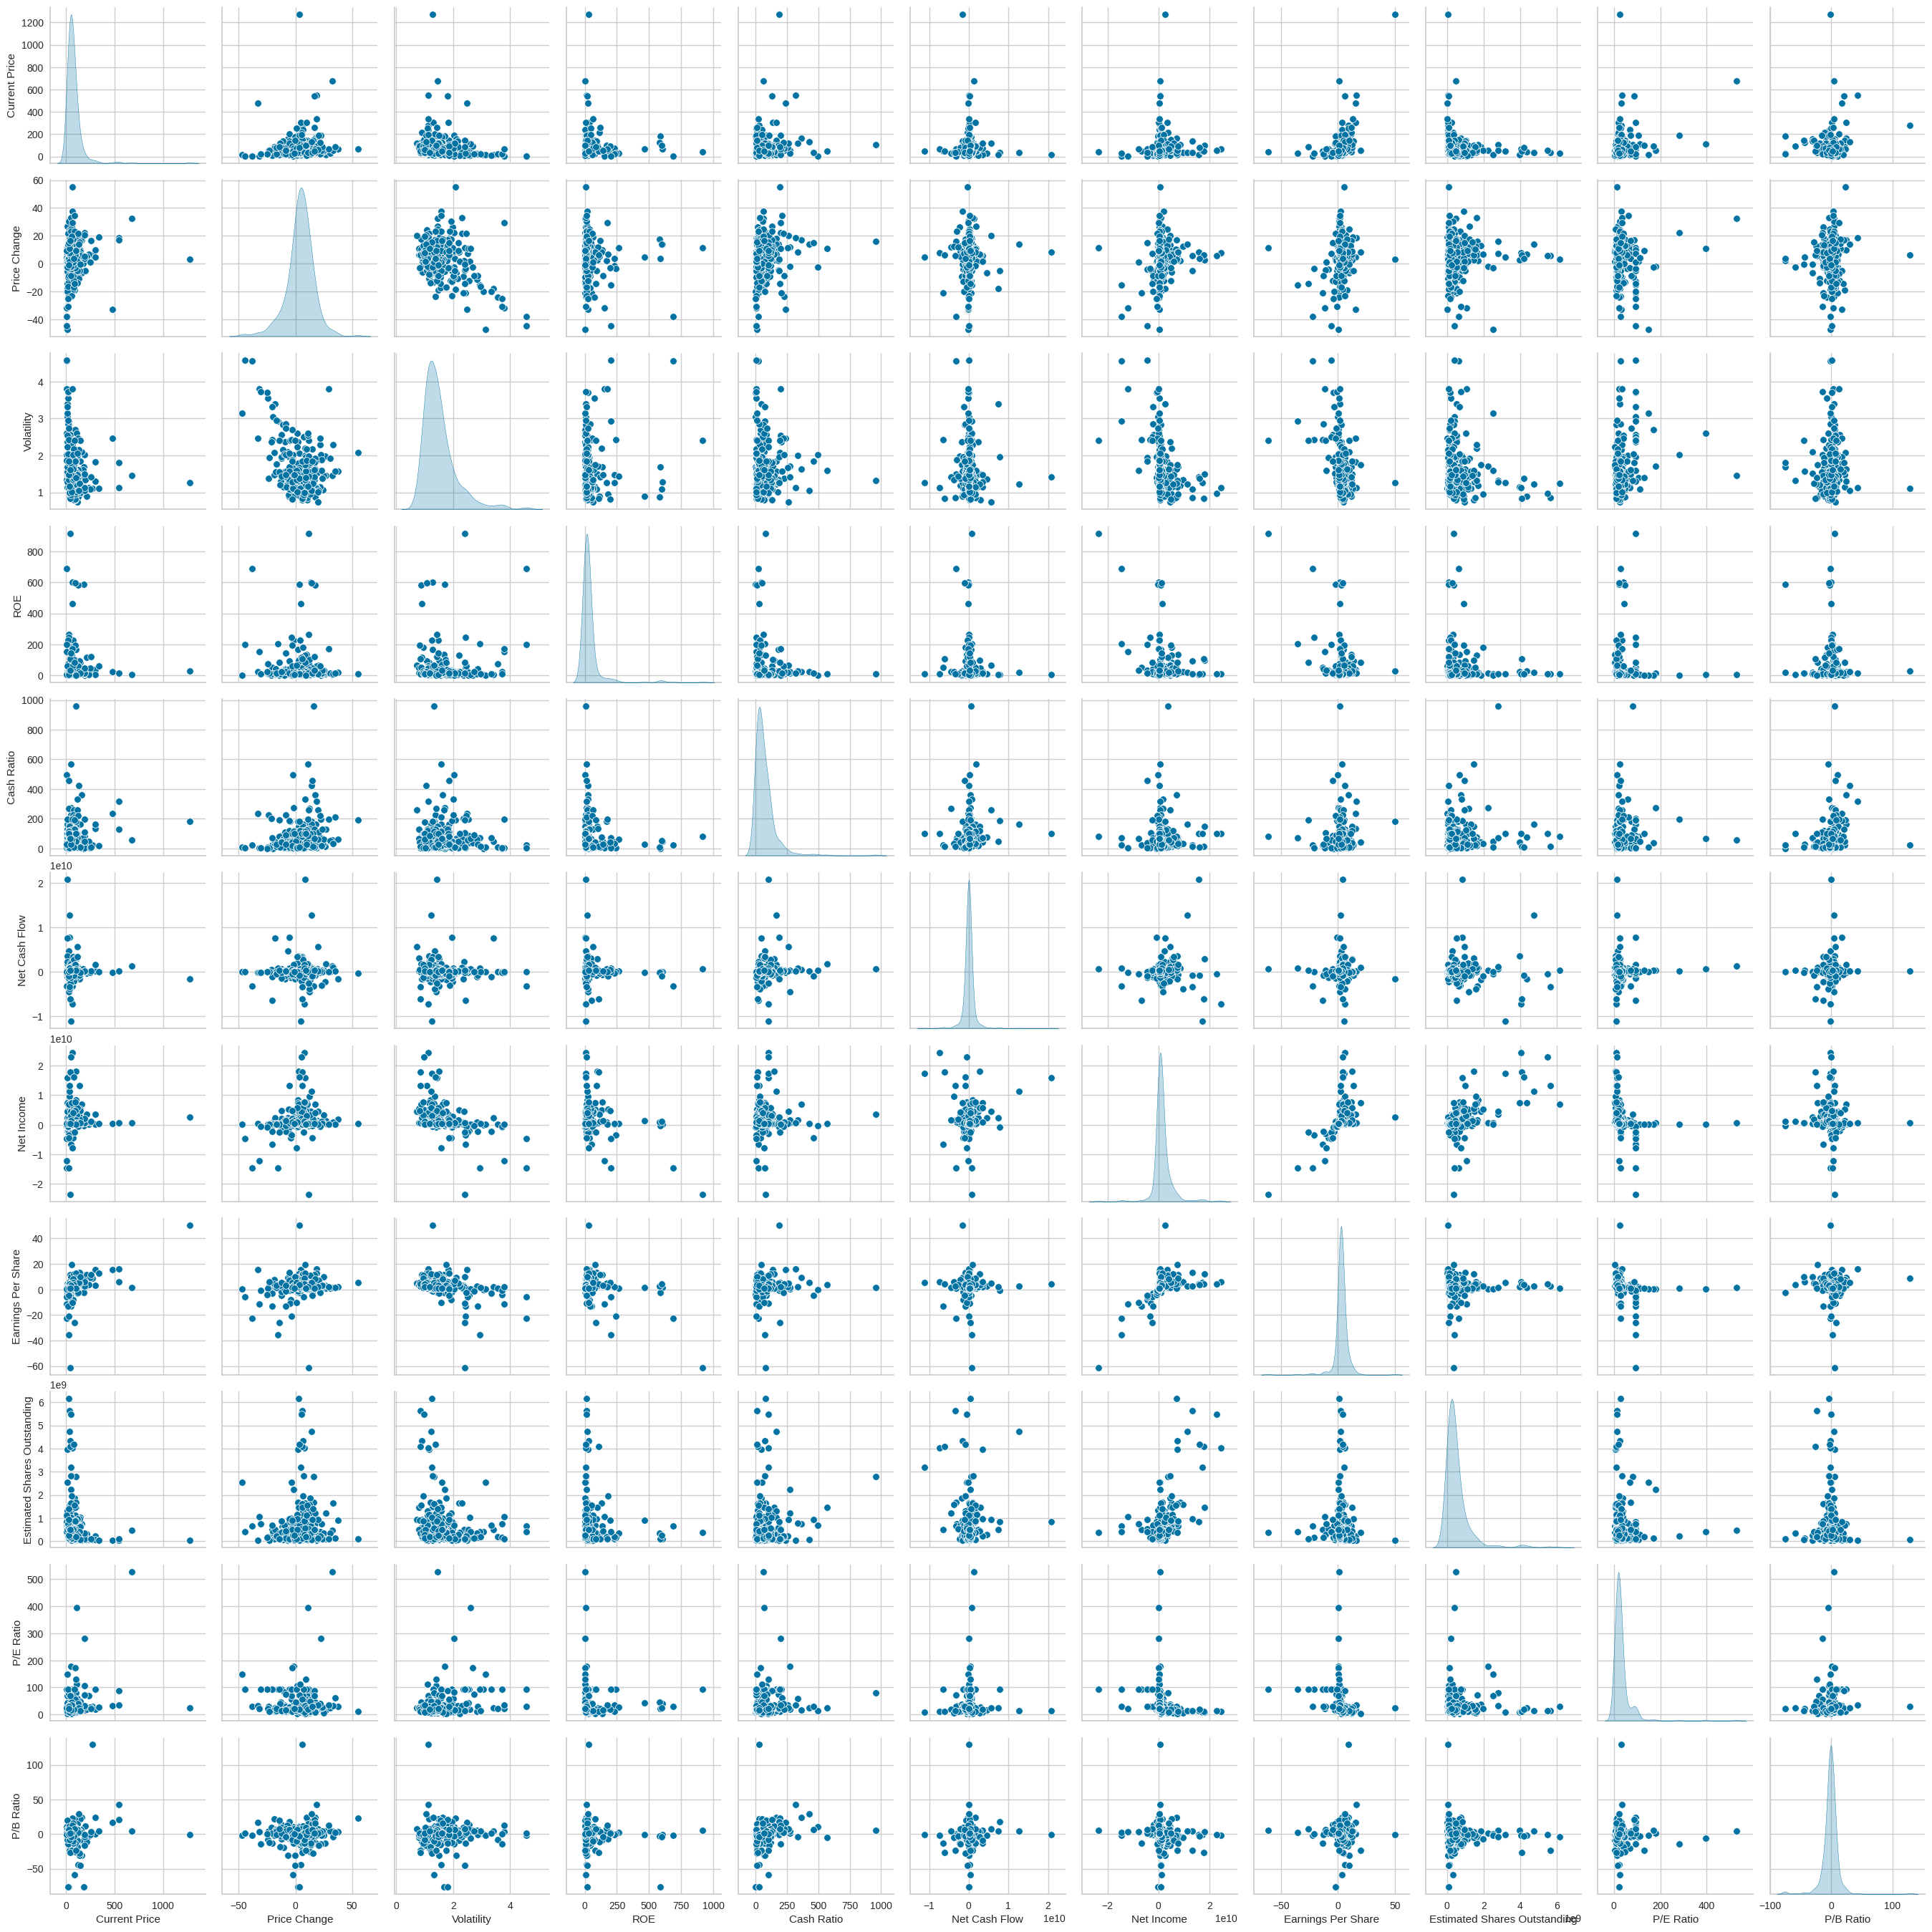

In [ ]:
# Select specific columns you want to include in the pairplot along with the Target_Category column
columns_to_include = ['Current Price','Price Change','Volatility','ROE','Cash Ratio','Net Cash Flow','Net Income','Earnings Per Share','Estimated Shares Outstanding','P/E Ratio','P/B Ratio']
new_data = data[columns_to_include].copy()

# Pair plot
sns.pairplot(new_data, diag_kind='kde')
plt.show()

- The KDE plots in the pairplot is not given any information to predict the possible number of clusters in the data set.


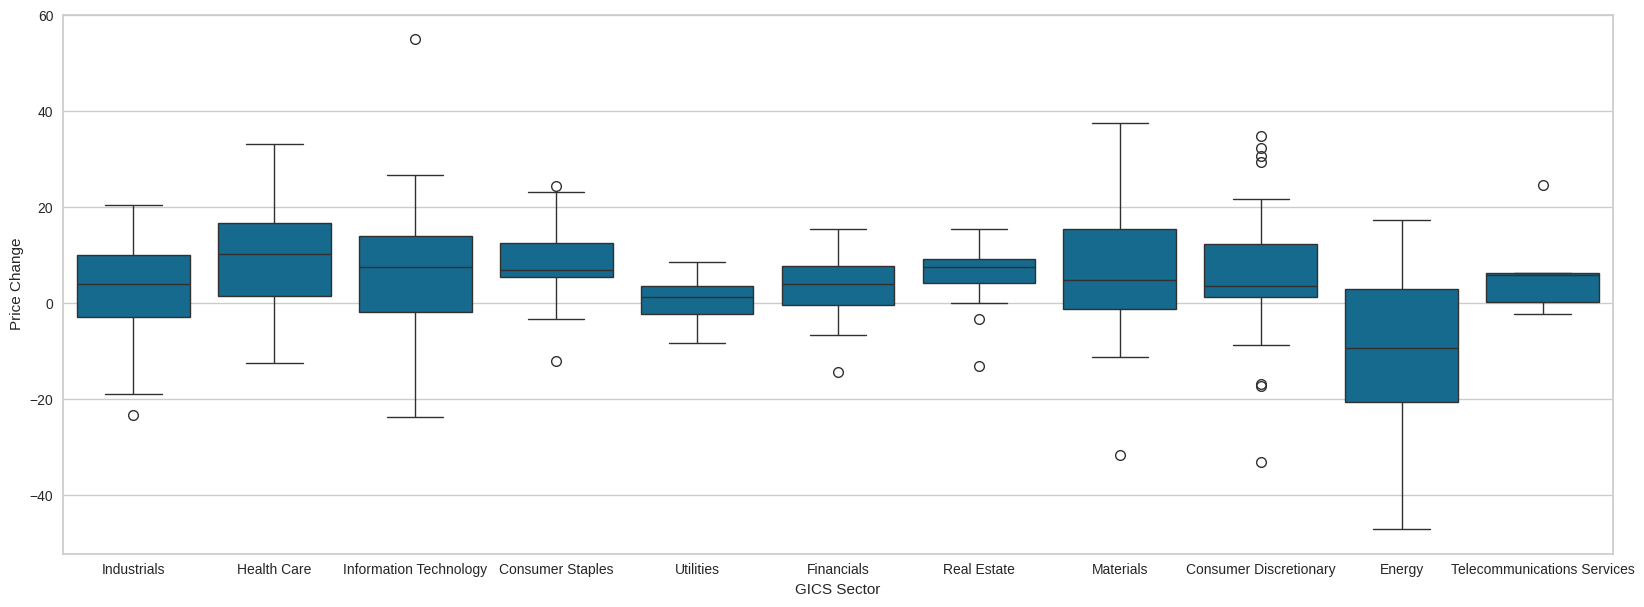

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(data = data,x = 'GICS Sector' , y = 'Price Change')
plt.show()

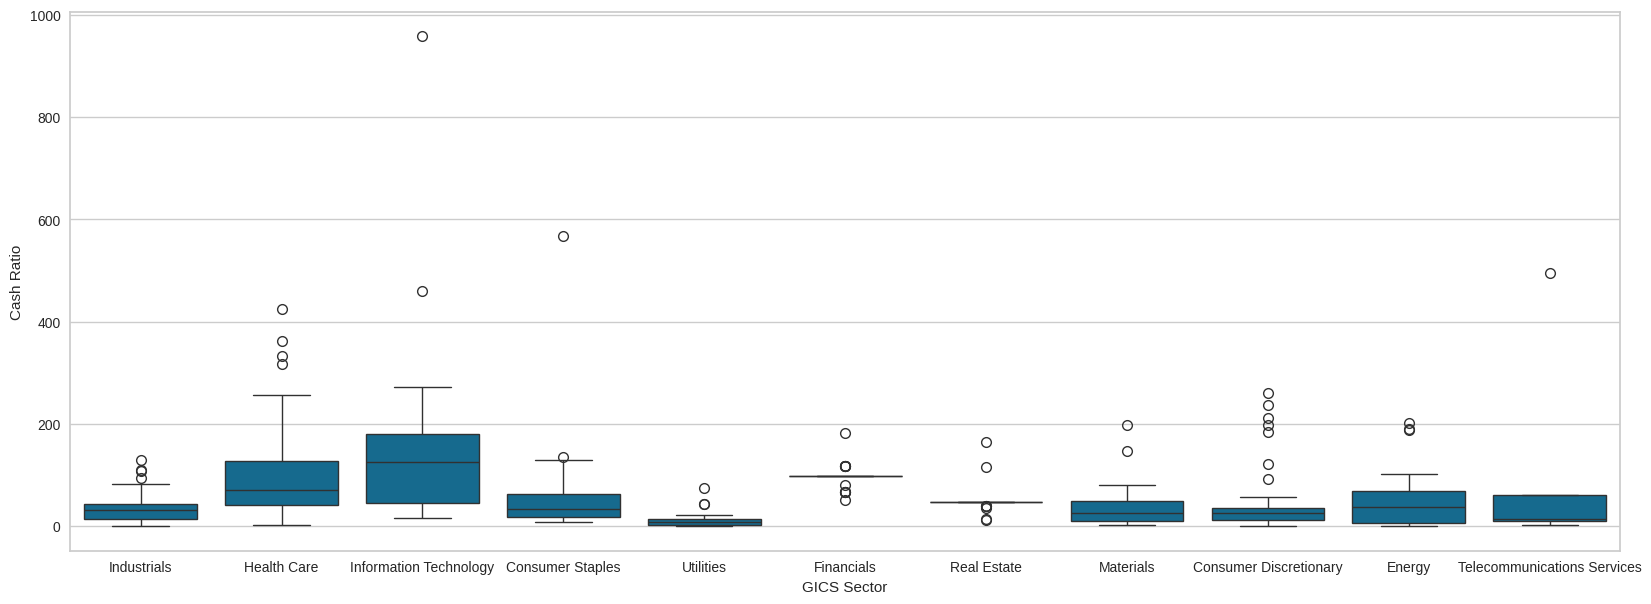

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(data = data,x = 'GICS Sector' , y = 'Cash Ratio')
plt.show()

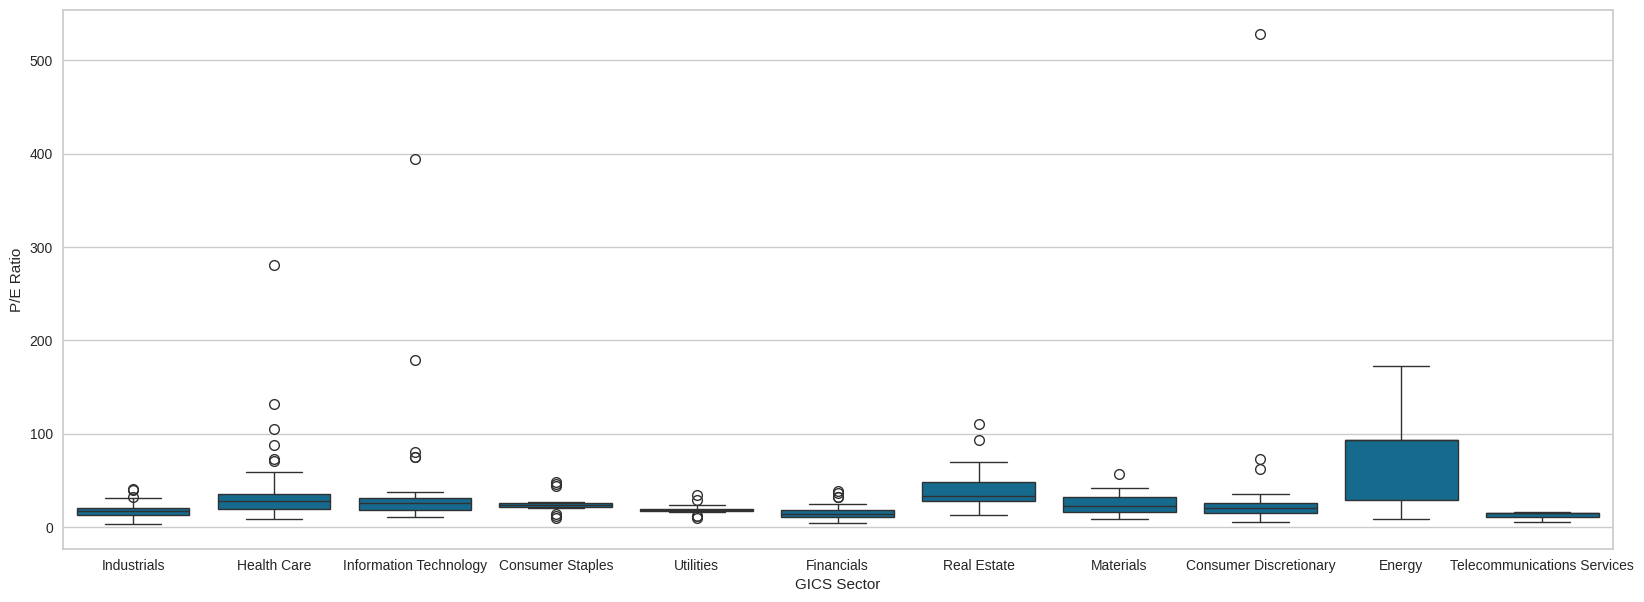

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(data = data,x = 'GICS Sector' , y = 'P/E Ratio')
plt.show()

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

###Missing value check

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()

print(f"There are {missing_values.sum()} missing values in the DataFrame.")


There are 0 missing values in the DataFrame.


###Dupilicate value check

In [ ]:
#Checking for duplicates
duplicates = data.duplicated().sum()
print(f'There are {duplicates} duplicates')

There are 0 duplicates


###Standardization of data

In [ ]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating a dataframe from the scaled data
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

####Univariate analysis

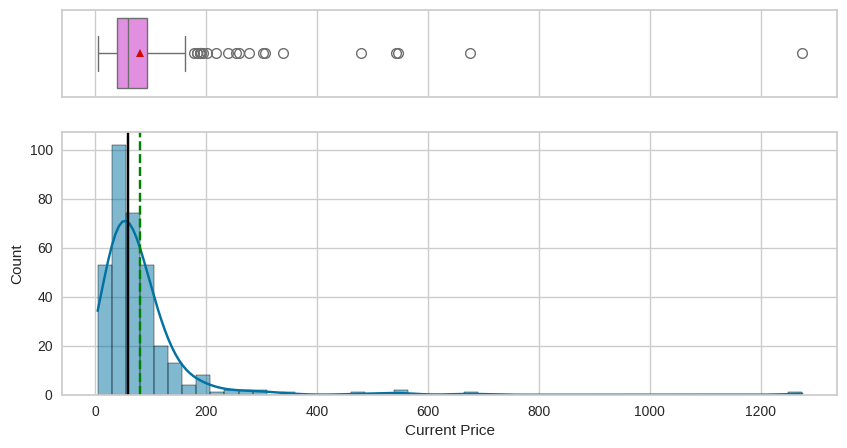

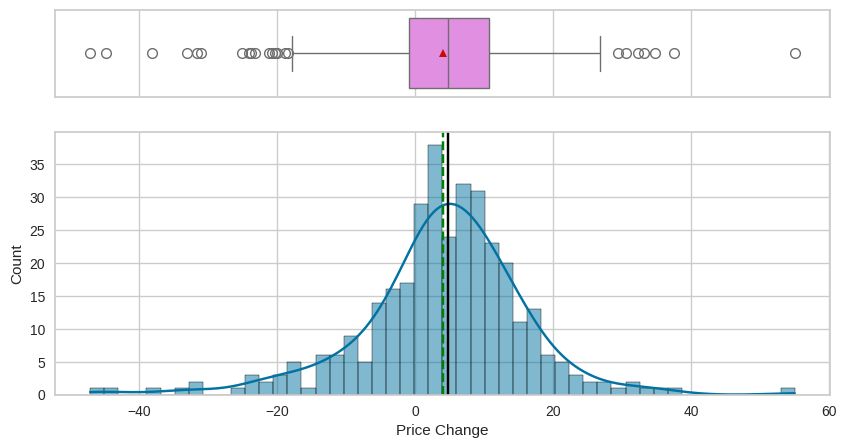

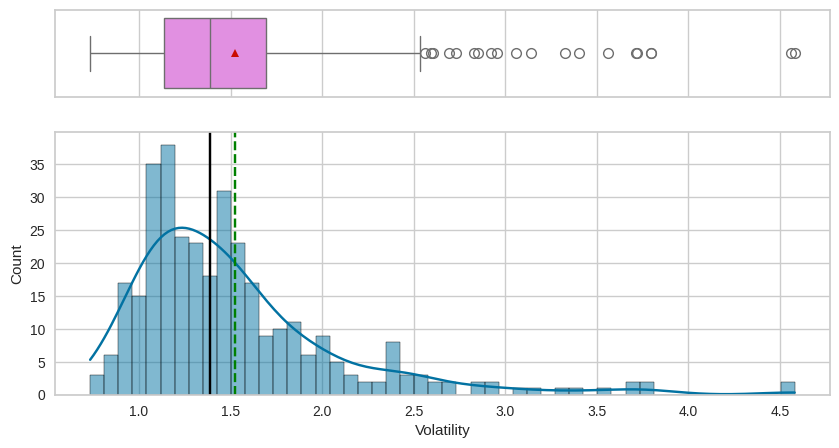

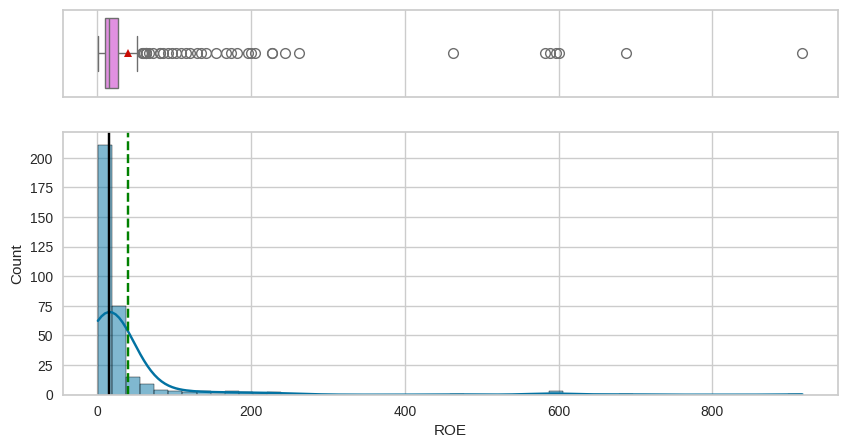

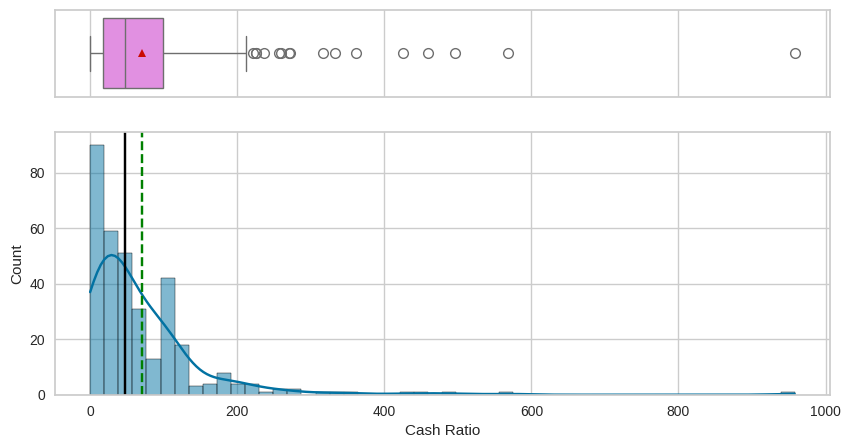

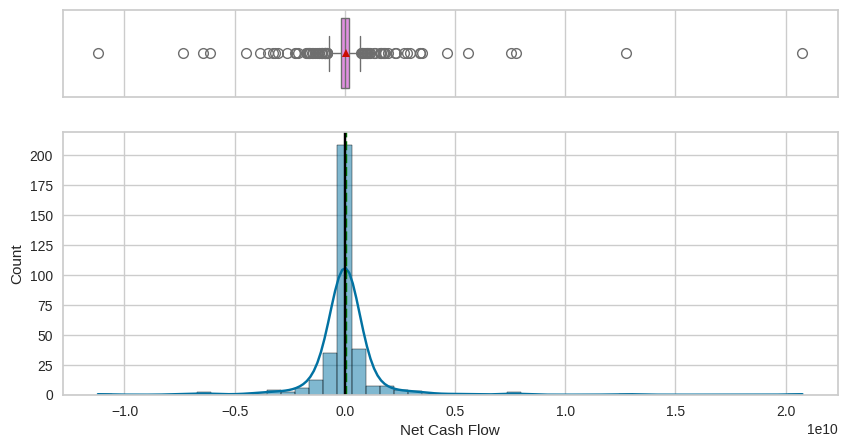

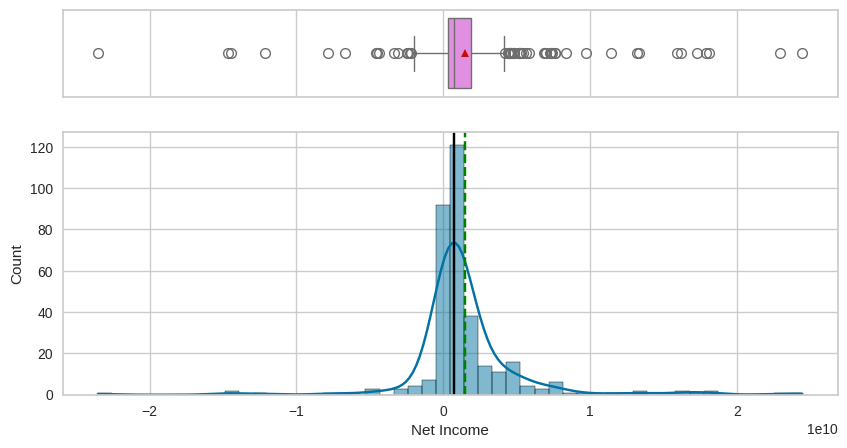

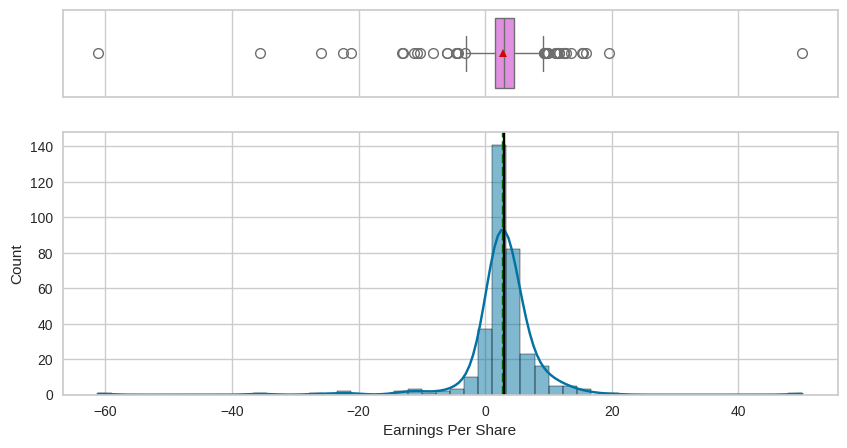

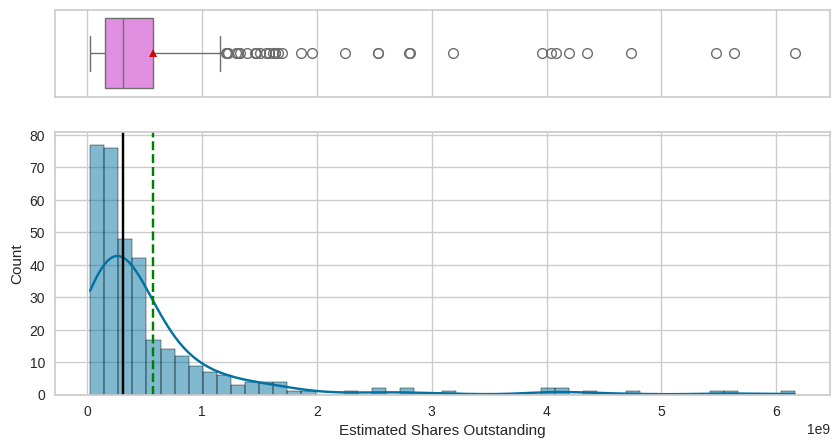

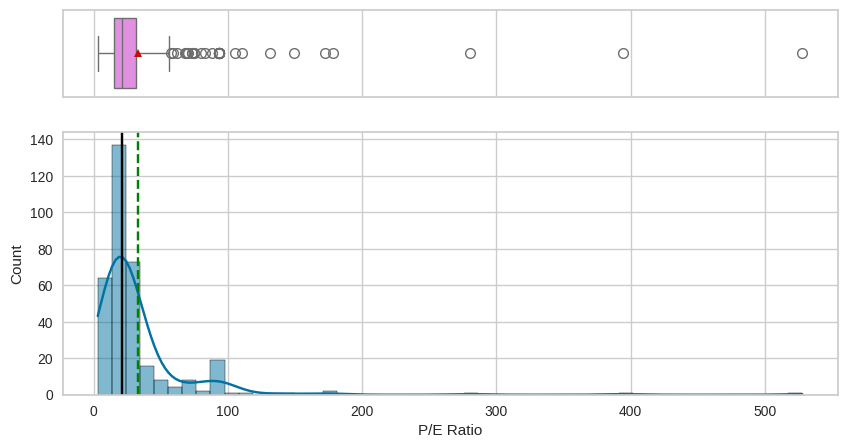

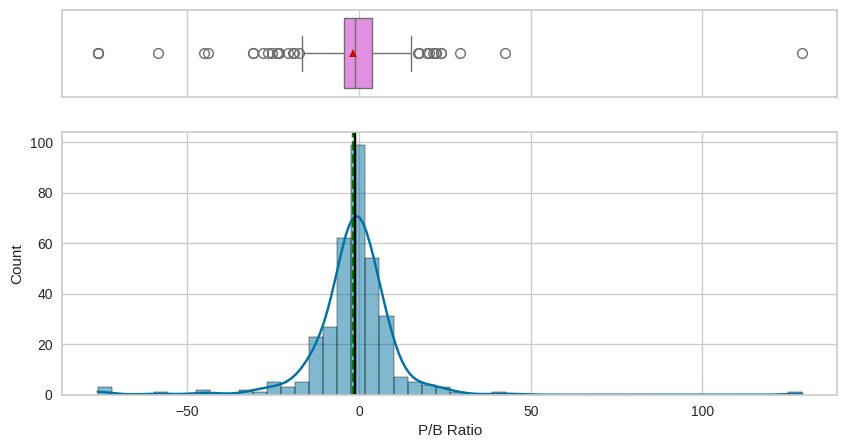

In [ ]:
#Carrying univariate analysis on scaled data
for item in subset_scaled_data:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

- Scaling has not corrected the skewwness in the data, distribution still remains the same as pre-scaling.

###Bivariate analysis.

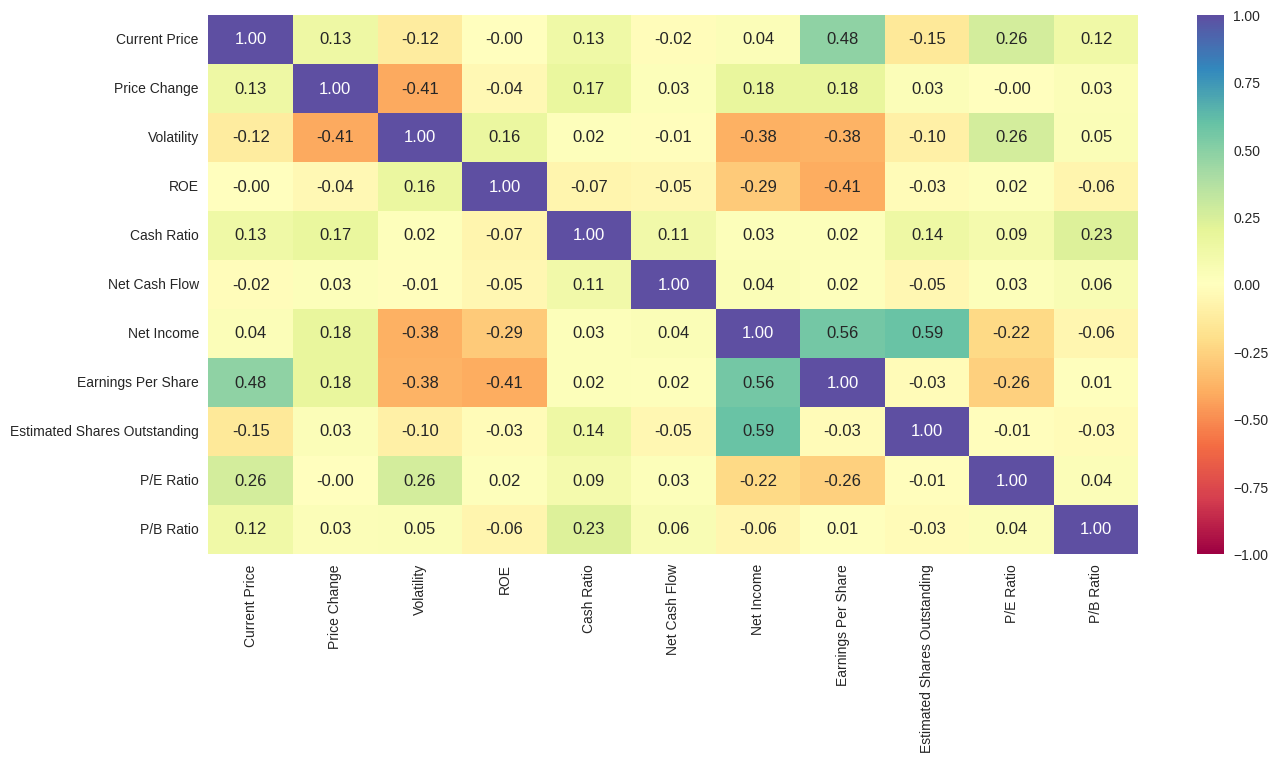

In [ ]:
# plotting a correlation heatmap of scaled data
plt.figure(figsize=(15, 7))
sns.heatmap(
  subset_scaled_data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Similiar correlations as data before scaling.

## K-means Clustering

###Building and checking model

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.267596864267437
Number of Clusters: 4 	Average Distortion: 2.2120688268033817
Number of Clusters: 5 	Average Distortion: 2.107108370017741
Number of Clusters: 6 	Average Distortion: 2.0561359702080875
Number of Clusters: 7 	Average Distortion: 2.013186854664601
Number of Clusters: 8 	Average Distortion: 1.9790958567033787
Number of Clusters: 9 	Average Distortion: 1.926215061948373
CPU times: user 486 ms, sys: 13 ms, total: 499 ms
Wall time: 304 ms


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

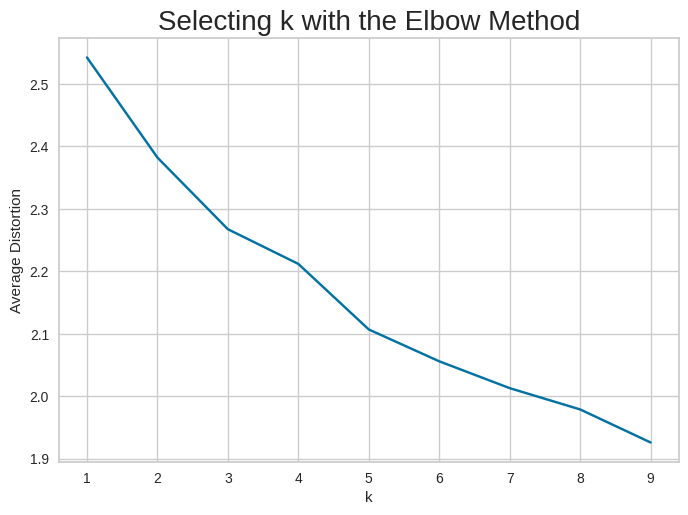

In [ ]:
%%time
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_data)
    prediction = model.predict(subset_scaled_data)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_data, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_data.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**- The appropriate value of k from the elbow curve seems to be 3 or 4.**

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45797710447228496
For n_clusters = 4, silhouette score is 0.4577225970476733
For n_clusters = 5, silhouette score is 0.4142345102550812
For n_clusters = 6, silhouette score is 0.402826741839592
For n_clusters = 7, silhouette score is 0.40941687414093847
For n_clusters = 8, silhouette score is 0.13783487891141907
For n_clusters = 9, silhouette score is 0.4194591136540441


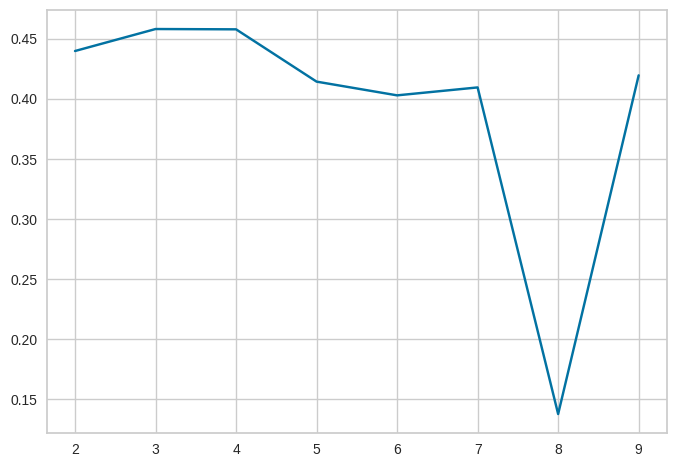

In [ ]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_data))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the silhoutte scores, though 3 and 4 have almost similiar scores, the score of 3 is very slightly higher. Hence, I will pick 3 as the value of K.**

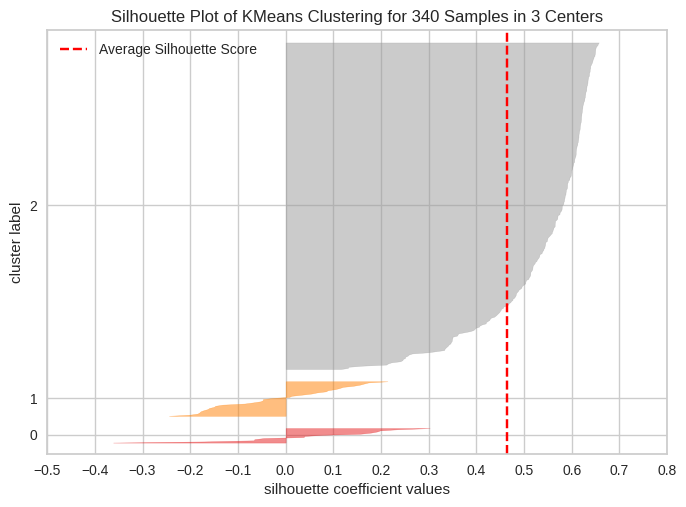

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

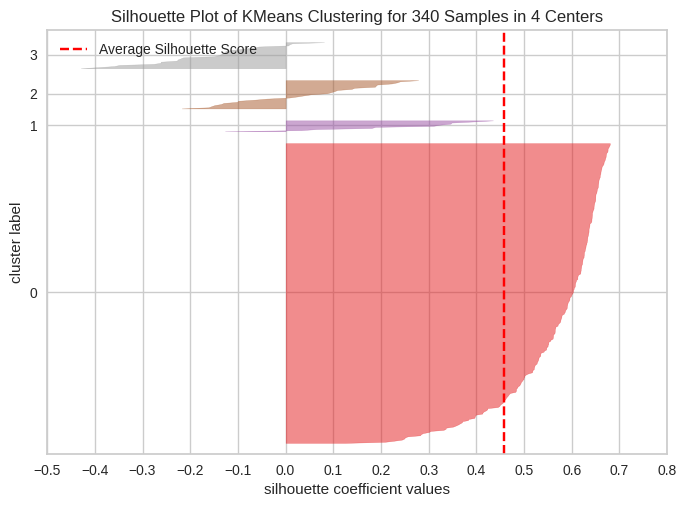

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

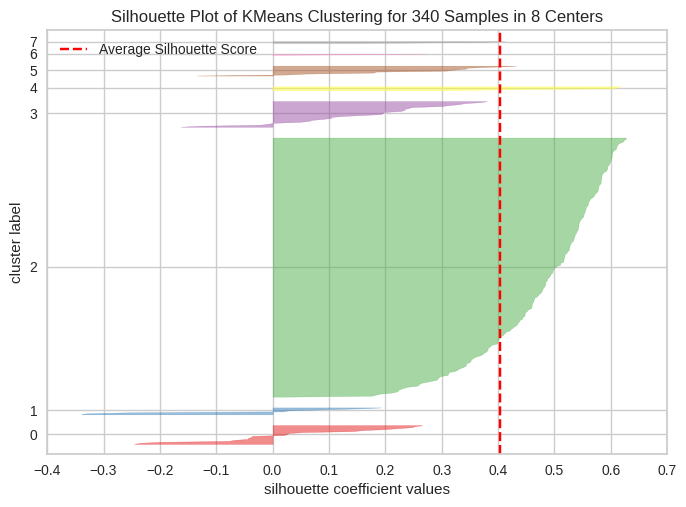

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

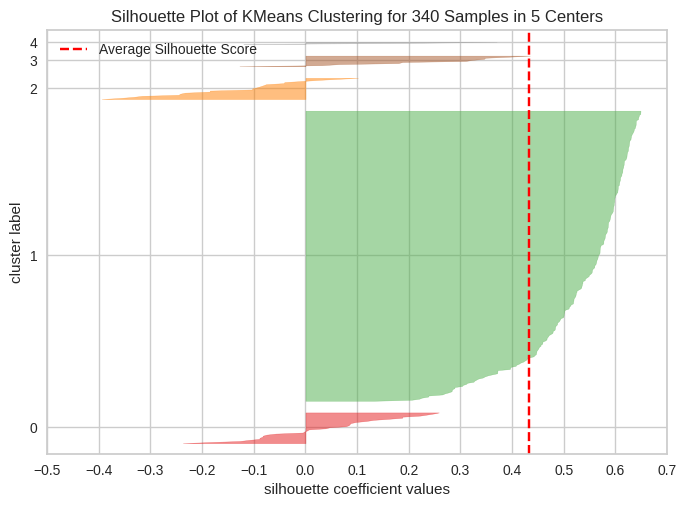

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

In [116]:
# Building Kmean model with maximum of 3 clusters
%%time
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(subset_scaled_data)

CPU times: user 733 ms, sys: 2.06 ms, total: 735 ms
Wall time: 1.01 s


KMeans(n_clusters=3, random_state=1)

In [ ]:
# adding kmeans cluster labels to the copy of original dataframe
data_kmeans=data.copy()
data_kmeans["K_means_segments"] = kmeans.labels_

###K-mean clusters profiling

In [ ]:
#dropping categorical features from data fram copy to enable profiling
data_profile1 = data_kmeans.drop(['Ticker Symbol','Security','GICS Sector','GICS Sub Industry'], axis = 1)

In [ ]:
# Getting the mean of feature values of data in each cluster for building profiles
cluster_profile = data_profile1.groupby("K_means_segments").mean()

In [ ]:
# Counting the number of stock in each cluster and adding to profile data frame
cluster_profile["count_in_each_segment"] = (
    data_kmeans.groupby("K_means_segments")["Security"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
num_co11 = data_profile1.copy()

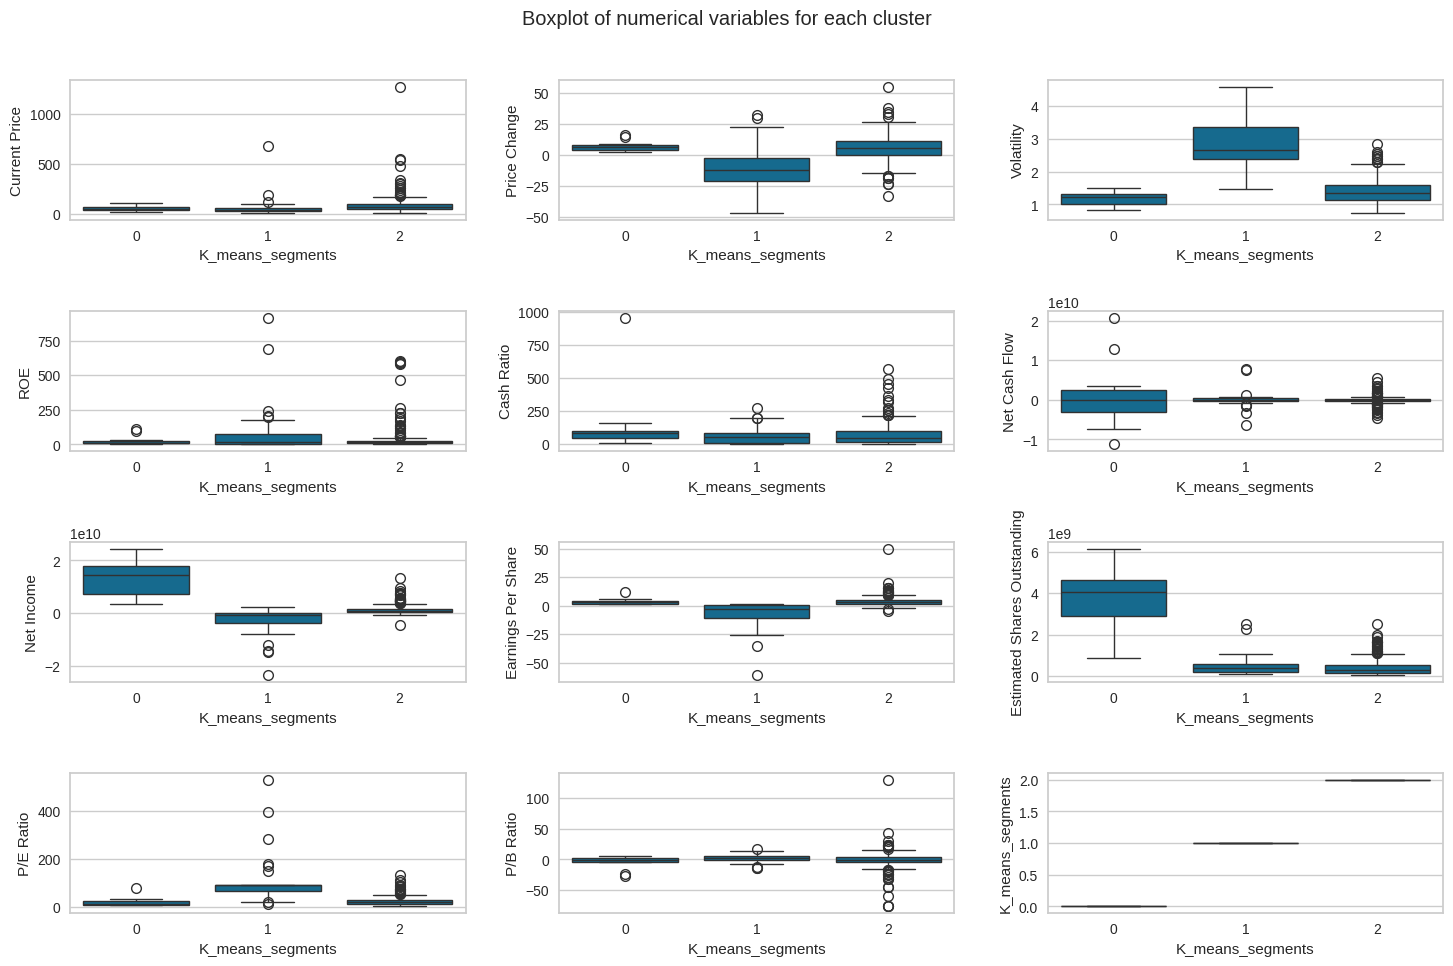

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

num_plots = len(data_profile1.columns)  # Get the number of variables

# Calculate the number of rows and columns needed based on the number of variables
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

for i, variable in enumerate(data_profile1.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=data_profile1, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

In [ ]:
# let's see the names of the securities in each cluster
for cl in data_kmeans["K_means_segments"].unique():
    print("In cluster {}, the following Securities are present:".format(cl))
    print(data_kmeans[data_kmeans["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following Securities are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Alliance Data Systems'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Cat

###Insights

- **Cluster 0 profile(Bluechip stocks)**:
   - slightly high current price compared to other clusters.
   - moderately high price increase.
   - low volatility.
   - very conservative cash ratio signaling stability.
   - very high cash flow demonstrating high income earning potential.
   - very high net income signalling high profitability.
   - moderate earnings per share.
   - very high shares outstanding.
   - low P/B and P/E values signalling the cluster of stocks being undervalued in the current market phase.
   - There are 14 securities in the cluster.

- **Cluster 1 profile(Growth stocks)**:  

   - moderate current price.
   - moderate price decrease.
   - slightly higher price volatility compared to the other clusters but moderate volatility.
   - modeerate cash ratio signalling healthy ability to meet financial obligations
   - moderate netcashflow signalling healthy cash generating abilities.
   - Negative net income and earnings per share values meaning very poor profitability currently.
   - Positive P/B ratio and very high positive P/E ratio signalling a high valuation by investors.
   - There are 32 of securities in the cluster.

- **Cluster 2 profile(value stocks)**:

  - higher current price when compared to the other clusters.
  - moderately high price increase.
  - low volatility
  -  modeerate cash ratio signalling healthy ability to meet financial obligations.
  - low net cash flow, signals limited cash making ability
  - Very high EPS and net income,signalling high profitability considering the cash flow
  - Low P/E and P/B ratios signalling the stocks in the cluster may currently be undervalued.
  - There are 294 securities in the cluster

## Hierarchical Clustering

###Checking Cophenatic correlation

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_data, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


###Checking Dendograms

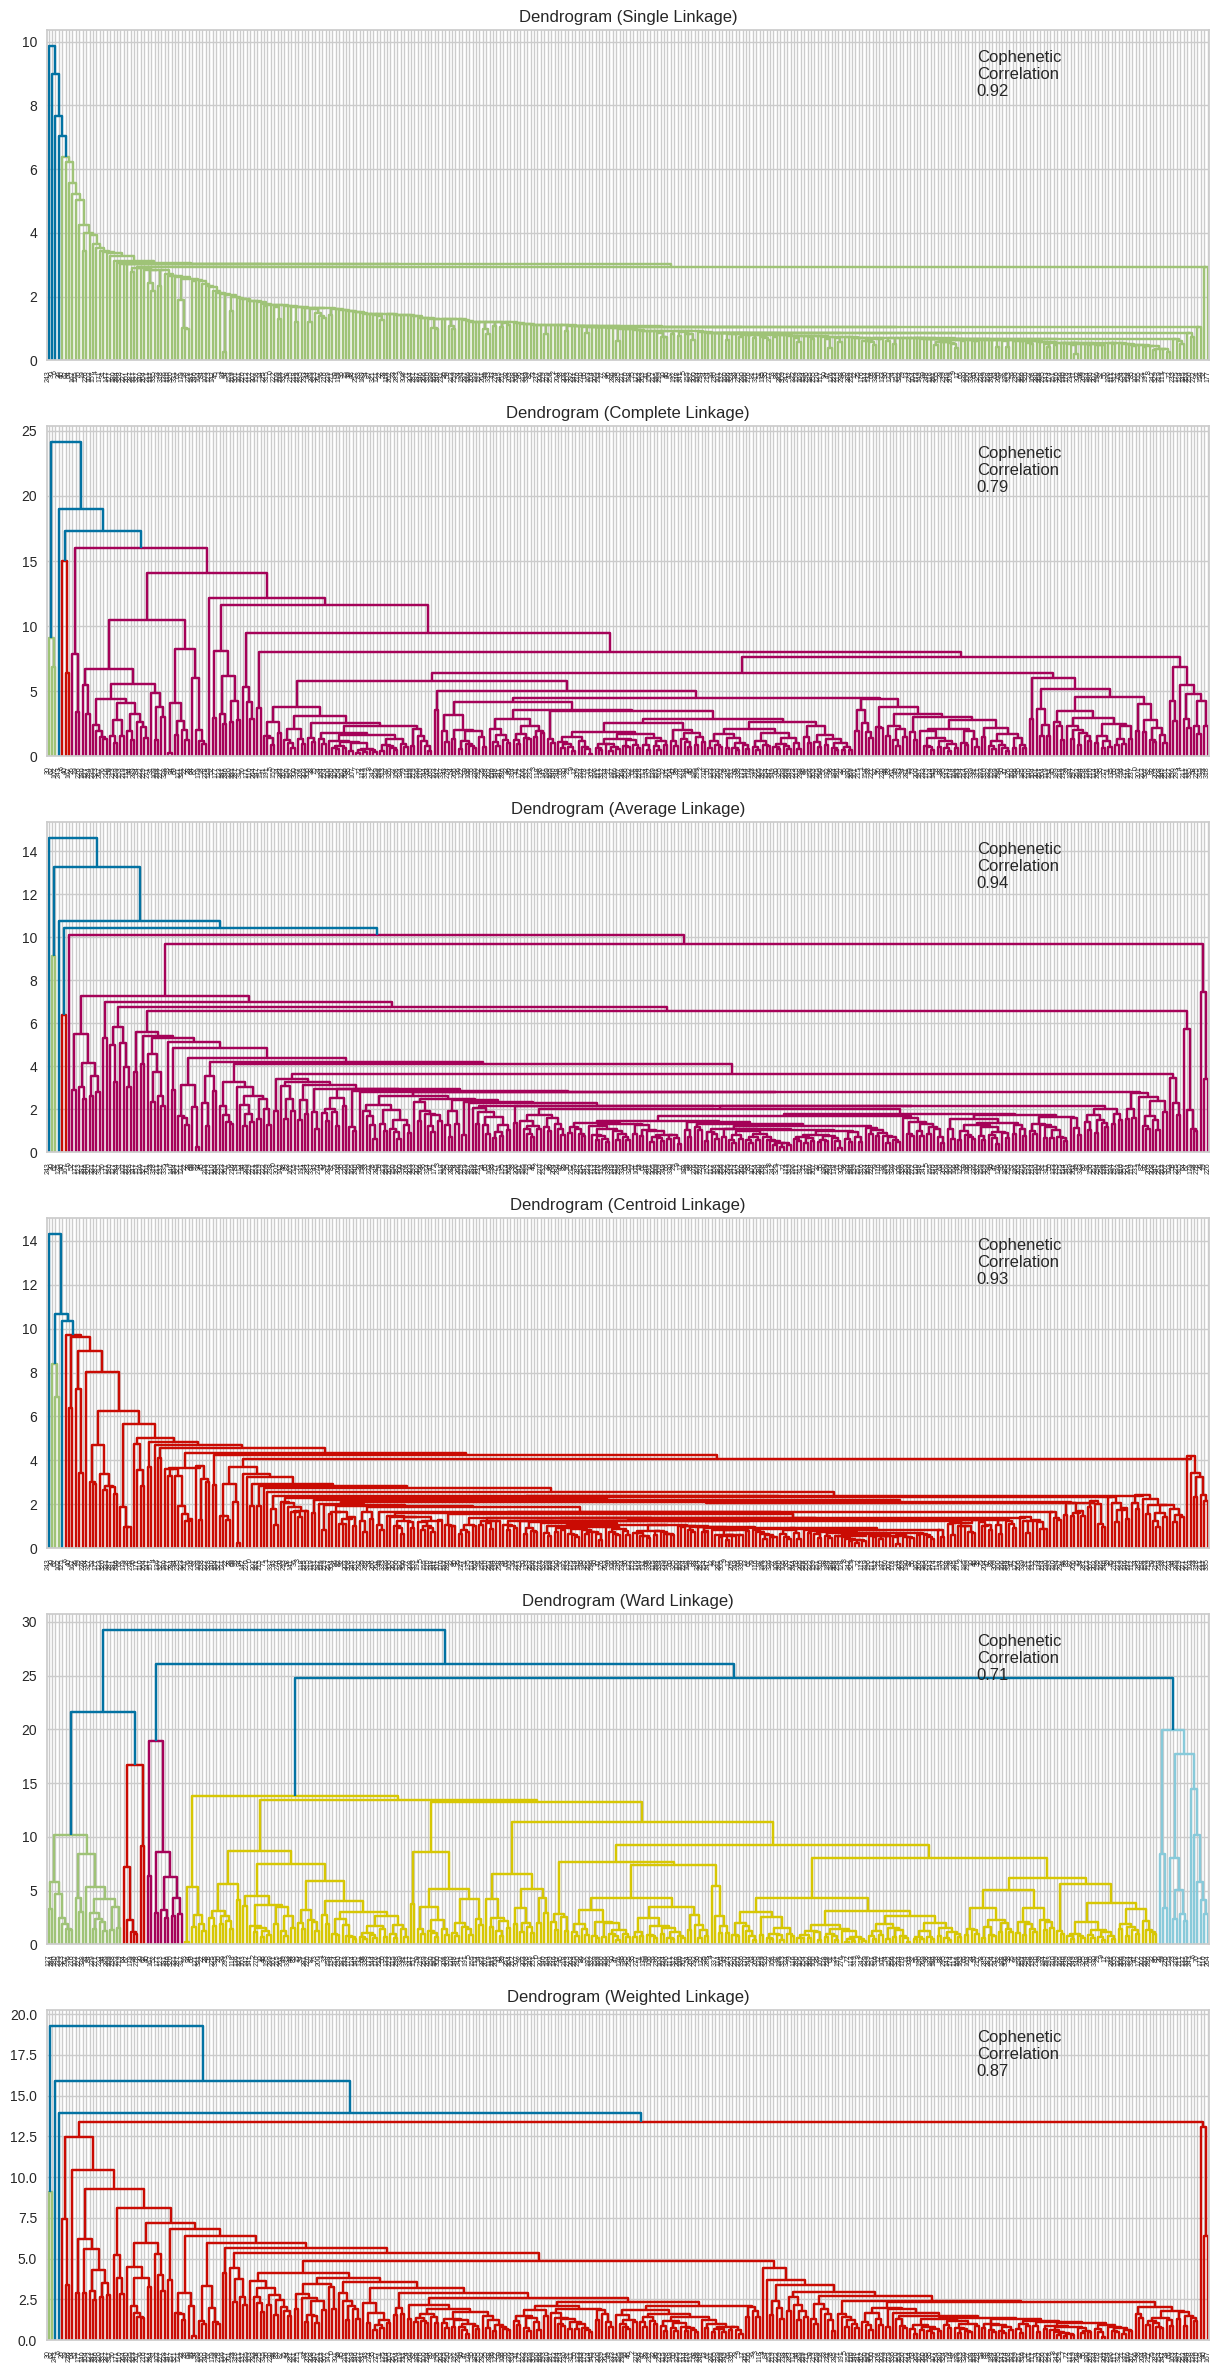

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_data, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observation**

1. Model with Euclidean distance and average location carries the highest cophenatic score of 0.94.
2. However, I will not be using the hyperparameter because the 3 clusters that it is suggesting has poor variability and most of the data points are in one cluster and very few in the other two.
3. I will go for the hyperparameter Euclidean distance and ward linkage, which suggests 4 clusters. Eventhough, the cophenatic score is o.71 and lower than other parameters, the variability of data point accross clusters is best among other linkage types.

###Creating model using SKlearn

In [ ]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_data)

CPU times: user 11.4 ms, sys: 0 ns, total: 11.4 ms
Wall time: 15.4 ms


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [ ]:
subset_scaled_data["HC_Clusters"] = HCmodel.labels_ #adding cluster label to scaled data frame


In [ ]:
data_HC = data.copy()

In [ ]:
data_HC["HC_Clusters"] = HCmodel.labels_ #adding cluster labels to copy of original data frame.

###Cluster profiling

In [ ]:
# Creating new profiling data frame from copy of originsl data frame with categorical variables dropped
data_HC_profile = data_HC.drop(['Ticker Symbol','Security','GICS Sector','GICS Sub Industry'], axis = 1)

In [ ]:
#Getting mean values of features in each cluster for the profile
cluster_profile_HC = data_HC_profile.groupby("HC_Clusters").mean()

In [ ]:
#Getting total number of securities in each cluster and adding column to profile
cluster_profile_HC["count_security_in_each_segments"] = (
  data_HC.groupby("HC_Clusters")["Security"].count().values
)

In [ ]:
#Displaying cluster profile
cluster_profile_HC.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
# let's see the names of the securities in each cluster
for cl in data_HC["HC_Clusters"].unique():
    print("In cluster {}, the following Securities are present:".format(cl))
    print(data_HC[data_HC["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 3, the following Securities are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Li

###Insights

- **Cluster 1 profile(Bluechip stocks)**:
   - high current price compared to other clusters.
   - moderately high price increase.
   - low volatility.
   - very conservative cash ratio signaling stability.
   - high positive cash flow demonstrating high income earning potential.
   - high net income signalling high profitability.
   - high earnings per share.
   - moderate shares outstanding.
   - high P/B and P/E values signalling the cluster of stocks being overvalued in the current market phase.
   - 15 securities in the cluster.

- **Cluster 0 profile(Growth stocks)**:  

   - moderate current price.
   - moderate price decrease.
   - slightly higher price volatility compared to the other clusters but moderate volatility.
   - modorate cash ratio signalling healthy ability to meet financial obligations
   - negative net cash flow signalling poor cash generating abilities currently
   - Negative net income and earnings per share values meaning very poor profitability currently.
   - Positive P/e ratio signalling a high valuation by investors due the potential for high growth in the future.
   - 29 securities in the cluster.
   - low P/b ratio meaning investors are probably pricing in debts the campanies may be owing when valueing the stocks here.

- **Cluster 2 profile(value stocks)**:

  - moderate current price when compared to the other clusters.
  - moderate price increase.
  - low volatility
  -  moderate cash ratio signalling healthy ability to meet financial obligations.
  - High net cash flow, signals good cash making ability
  - Very high EPS and net income,signalling high profitability.
  - Very high shares outstanding signalling a lot of company stock may fall in this cluster
  - high P/E  ratios signalling the stocks in the cluster may currently be overvalued by investors based on recent higher profitability
  - P/B ratios are low and negative which may imply current valuation is higher than the balance sheet for companies in the cluster.
  - number of securities in the cluster is 11


- **Cluster 3 profile(income stocks)**:

  - Moderate current price.
  - Moderate price increase.
  - Low volatility.
  - Healthy cash ratio.
  - low net cash flow
  - moderate net income.
  - moderate earnings per share.
  - moderate outstanding shares.
  - Moderate P/E ratio
  - Negative P/b ratio.
  - 285 securities in the cluster.


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**Observations**

1. Hierarichical clustering took less than a second to execute while K means took a second to execute.

2. Heirarichical clustering gave the most distinct cluster. When Kmean gave me three clusters which had a couple of mis-clustered datapoints points, hierachical clustering gave 4 distinct clusters.

3. Bluechip cluster -> kMEAN = 14  AND hIERACHICAL =  15
   Growth cluster -> kmean = 32 and heirachical = 29]
   Value cluster -> Kmean =294 and hierachical = 11
   

4. Herachical algorithm gave 4 appropriate clusters while Kmean gave 3 appropriate clusters.

5. The cluster profile blue chip stocks in Kmean algorithm may have actually contained a combination of bluechip and income clusters from Hierachical cluster.




## Actionable Insights and Recommendations

- The income stocks cluster provides stability as they include companies from matured industries, they have moderate profitability, with regular expected high dividend pay out to investors(key difference from blue chip ) and lower debts. They typically carry a lower risk profile.

- The value stock  cluster include stocks from companies who currently undervalued but their profitability is quite, they may have intellectual properties not captured in their balance sheet giving them the edge in terms of profitability from higher net income and possible higher valuation in future. Because they appear lowly valued they may be ignored by a lot of investors. They are general less risky when compared to growth stocks as their valuation is already low.

- The growth stock cluster contains stocks from companies who are in new innovative industries, or existing companies making a lot investments into research,improving productivity, or even exploring new frontiers. They generally the riskiest  because of very high valuations but future returns may come in form of financial windfalls from higher valuations and dividend in the furture. Companies in this category may appear not profitable initially but usually attract a lot of valuation from investor despite weak balance sheets.

- The blue ship cluster also contains companies who target stability, they usually contain more older companies who have made a lot of money over the years and have eficients systems to stay profitable irrespective of market cycle, they generally do not pay as much dividend when compared to income stocks, but the tendency of their valuation to keep soaring is high.

- My recommendations based on this data will be to diversify investments into the different clusters.

- The ratio to use depends on the risk appetite of the investor.

- For a risk averse investor I will recommend investing 40% to bluechip, 30% to income stocks, 20% to value stocks and 10% to growth stock.

- For Investors ready to take moderate risk, I will recommend 20% to bluechip, 30% to income stocks, 30% to value stocks and 20% to growth stock.

- For Investors who can tolorate high risk, I will recommend investing 40% to value stocks, 30% to growth stocks, 20% to income stocks and 10% to blue chip.

- Ultimately, the level of risk to take depends on several factors namely;
   
   - current market cycle
   - Investors inert risk tolerance.
   - portfolio size
   - Age of investor(the older the lesser risk to take)
   - country companies operate.
   - General socio economic situation of the world.